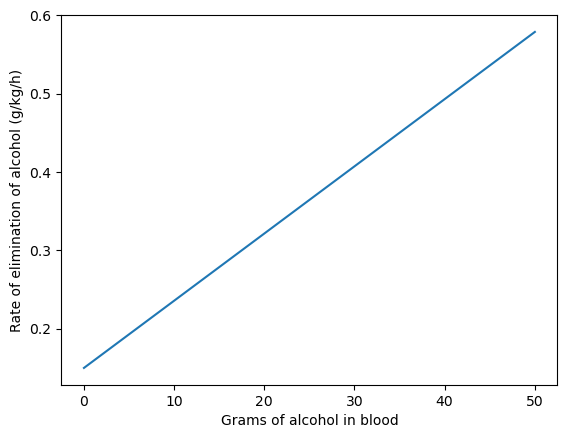

In [7]:
##Graph the elimination rate of alcohol.

import numpy as np
import matplotlib.pyplot as plt


def alcohol_elim_rate(x):
    return 0.15+(0.05*(x/5.83))

at_values = np.linspace(0, 50, 100)
plt.xlabel("Grams of alcohol in blood")
plt.ylabel("Rate of elimination of alcohol (g/kg/h)")
plt.plot(at_values, alcohol_elim_rate(at_values))

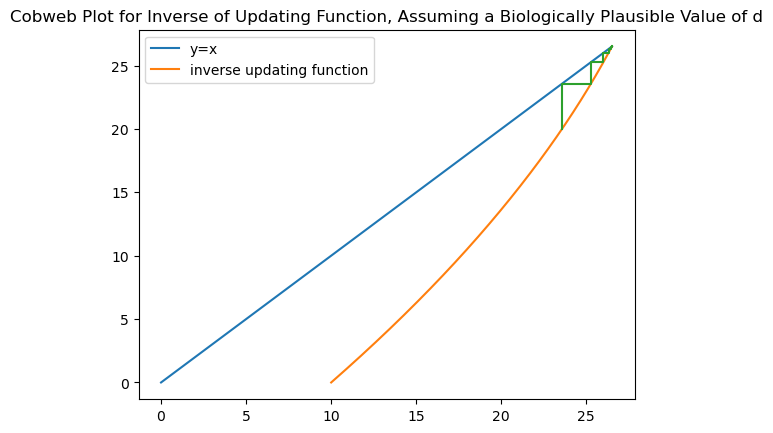

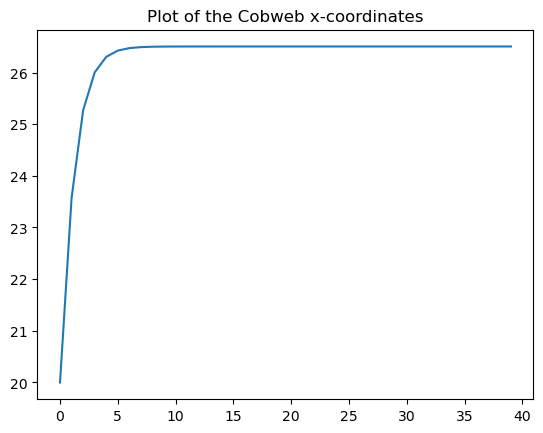

values of t (h): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
values of a (g): [20, 23.569468267581474, 25.269726977559777, 26.00277477894972, 26.303522402546513, 26.424243692410965, 26.47226533138019, 26.491298329486256, 26.49883096272334, 26.501810414447043, 26.502988635785186, 26.503454520275394, 26.503638730670566, 26.503711566302393, 26.503740364892614, 26.503751751585497, 26.503756253773304, 26.503758033894037, 26.50375873773615, 26.50375901602834, 26.50375912606231]


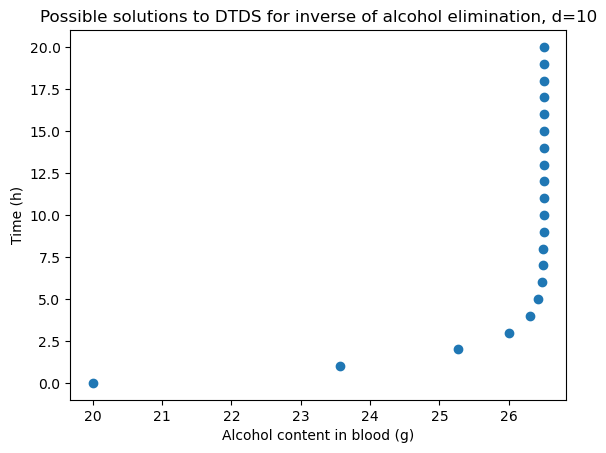

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def alcohol_elim_rate(x):
    return 0.15+(0.05*(x/5.83))

def alcohol_update(x, d=10):
    return (x-((alcohol_elim_rate(x))*x))+d

def plot_cobweb(f, m_0, steps): #function to cobweb
    
    cobwebs_x=[m_0] #starting x-value
    cobwebs_y=[f(m_0)] #starting y-value
    
    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_x.append(cobwebs_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_y.append(cobwebs_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_x.append(cobwebs_y[i-1]) #append the same x-value, but "move up" to the updating curve. 
            cobwebs_y.append(f(cobwebs_x[i]))
            
            
    xvalues=np.linspace(0,max(cobwebs_x), 500) #linspace for plotting
    plt.title("Cobweb Plot for Inverse of Updating Function, Assuming a Biologically Plausible Value of d")
    plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
    plt.plot(f(xvalues), xvalues, label="inverse updating function") #plot the updating function
            
    plt.plot(cobwebs_y, cobwebs_x) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
        label = f"({x},{y})"
        #uncomment the following code to see point labels. It gets too messy with a lot of steps
        #plt.annotate(label, # this is the text
                    #(x,y), # these are the coordinates to position the label
                     #textcoords="offset points", # how to position the text
                     #xytext=(0,10), # distance from text to points (x,y)
                     #ha='center') # horizontal alignment can be left, right or center
    plt.legend()
    plt.draw()  
    
    plt.figure() 
    
    
    
    
    distinct_solutions=list(OrderedDict.fromkeys(cobwebs_x))#get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats
    plt.title("Plot of the Cobweb x-coordinates")
    plt.plot(list(range(len(distinct_solutions))),distinct_solutions) #plots the solution set. 
    plt.draw()

    plt.show()
    
plot_cobweb(alcohol_update,20,100)

n = 20
t = [0]
a = [20]

d = 10

for i in range(1, n+1):
    at = a[i-1]-(0.15+(0.05*(a[i-1]/5.83)))*a[i-1]+d
    t.append(i)
    a.append(at)
    
print("values of t (h):", t)                 
print("values of a (g):", a) 
                 
                 
plt.scatter(a,t)
plt.ylabel("Time (h)")
plt.xlabel("Alcohol content in blood (g)")
plt.title("Possible solutions to DTDS for inverse of alcohol elimination, d=10")
plt.show()

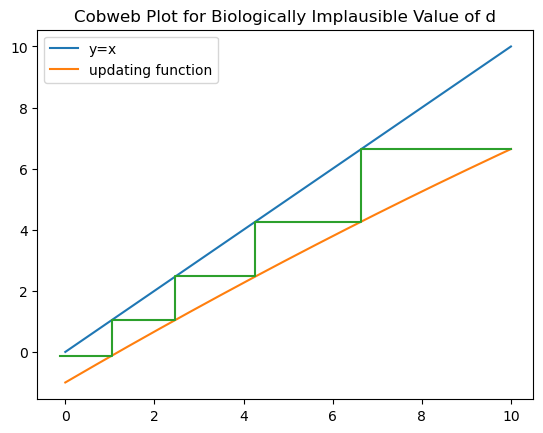

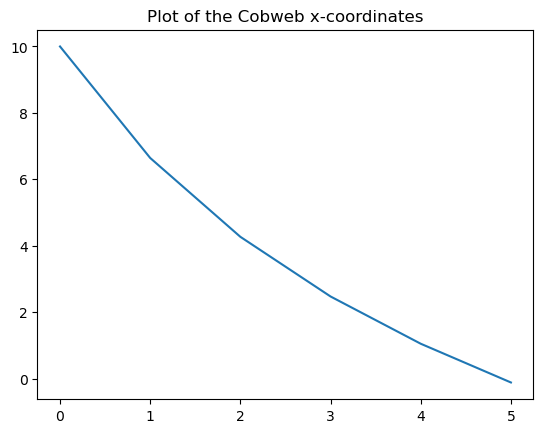

values of t (h): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
values of a (g): [40, 19.2778730703259, 12.198916036744453, 8.09280459631391, 5.317190199884666, 3.2771372992180083, 1.6934601101849993, 0.4148458351256217, -0.6488570012660438, -1.5551392178693788, -2.342609827358401, -3.0382837117729613, -3.661710691141021, -4.227446584773611, -4.746599791115152, -5.227836319677849, -5.678054290125338, -6.102849581611776, -6.506845583613397, -6.89393229194608, -7.267443669817435]


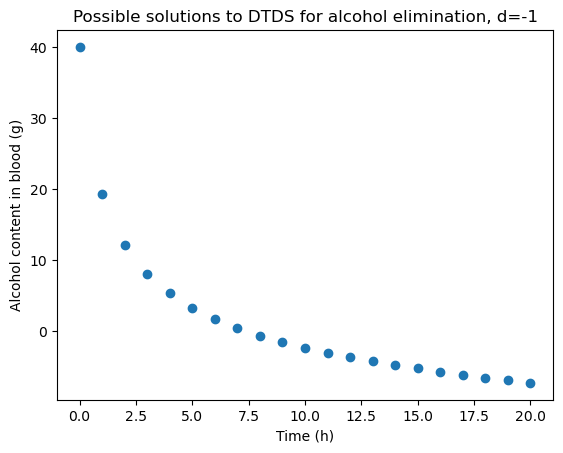

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def alcohol_elim_rate(x):
    return 0.15+(0.05*(x/5.83))

def alcohol_update_2(x, d=-1):
    return (x-((alcohol_elim_rate(x))*x))+d

plot_cobweb(alcohol_update_2,10,10)

n = 20
t = [0]
a = [40]

d = -1

for i in range(1, n+1):
    at = a[i-1]-(0.15+(0.05*(a[i-1]/5.83)))*a[i-1]+d
    t.append(i)
    a.append(at)
    
print("values of t (h):", t)                 
print("values of a (g):", a) 
                 
                 
plt.scatter(a,t)
plt.xlabel("Time (h)")
plt.ylabel("Alcohol content in blood (g)")
plt.title("Possible solutions to DTDS for alcohol elimination, d=-1")
plt.show()

It takes 15 hours for the amount of alcohol to decrease from 50g to below 1g


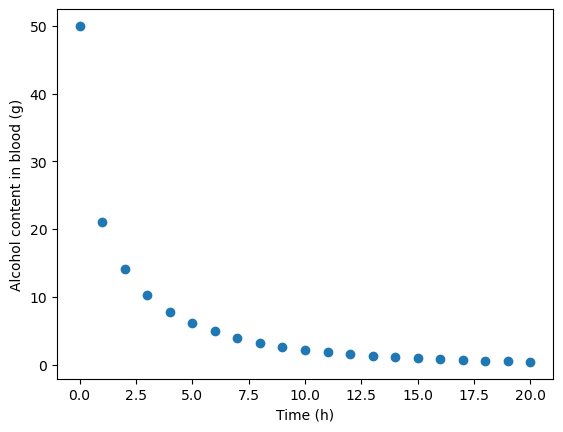

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict


n = 20
t = [0]
a = [50]
d = 0

stop = False

for i in range(1, n+1):
    at = a[i-1]-((0.15+(0.05*(a[i-1]/5.83)))*a[i-1])+d
    t.append(i)
    a.append(at)
    if at < 1 and stop == False:
        print(f"It takes {t[i]} hours for the amount of alcohol to decrease from 50g to below 1g")
        stop = True
                 
plt.scatter(t,a)
plt.xlabel("Time (h)")
plt.ylabel("Alcohol content in blood (g)")
#plt.title("")
plt.show()